<a href="https://colab.research.google.com/github/RaghulRoshan/Brain-tumour-classification/blob/main/project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Categories: ['train', 'valid', 'test']
Total Categories: 3
Train Classes: ['no_tumor', 'pituitary', 'glioma', 'meningioma']


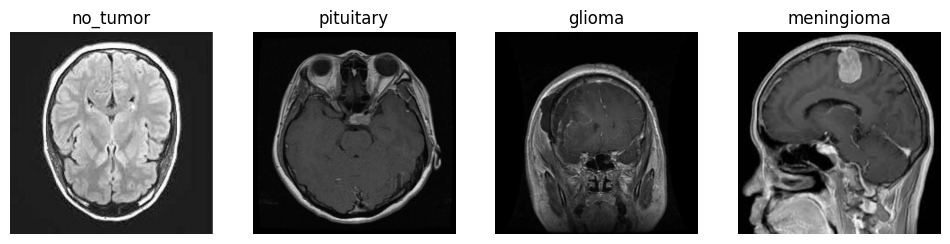

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_dir = "/content/drive/MyDrive/project 66/Tumour"

# Only keep directories (train, valid, test)
categories = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
print("Categories:", categories)
print("Total Categories:", len(categories))

# Path to train folder
train_path = os.path.join(data_dir, "train")

# Only class folders (ignore csv files)
class_names = [c for c in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, c))]
print("Train Classes:", class_names)

plt.figure(figsize=(12, 6))

for i, cls in enumerate(class_names[:4]):  # Show first 4 classes
    class_path = os.path.join(train_path, cls)

    # List only files (ignore subfolders if any)
    images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]

    first_image = images[0]  # take first image
    img_path = os.path.join(class_path, first_image)

    img = mpimg.imread(img_path)

    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = "/content/drive/MyDrive/project 66/Tumour"

img_size = 224     # Resize all images to 224x224
batch = 32         # Batch size

# Data Preprocessing Generator
datagen = ImageDataGenerator(
    rescale=1/255.0,     # Normalize pixel values (0–255 → 0–1)
    validation_split=0.2 # 20% images for validation
)

# TRAIN DATA
train_gen = datagen.flow_from_directory(
    directory=data_dir + "/train",
    target_size=(img_size, img_size),   # Resize images
    batch_size=batch,
    class_mode='categorical',
    subset='training'
)

# VALIDATION DATA
val_gen = datagen.flow_from_directory(
    directory=data_dir + "/train",
    target_size=(img_size, img_size),   # Resize images
    batch_size=batch,
    class_mode='categorical',
    subset='validation'
)

print("\nPreprocessing Completed Successfully ✔️")


Found 1358 images belonging to 4 classes.
Found 337 images belonging to 4 classes.

Preprocessing Completed Successfully ✔️


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/drive/MyDrive/project 66/Tumour"
img_size = 224
batch = 32

# -----------------------------------------
# 📌 DATA AUGMENTATION GENERATOR
# -----------------------------------------
augment = ImageDataGenerator(
    rescale = 1/255.0,         # Normalize (0–255 → 0–1)
    rotation_range = 25,       # Rotate images by ±25 degrees
    width_shift_range = 0.1,   # Shift horizontally by 10%
    height_shift_range = 0.1,  # Shift vertically by 10%
    zoom_range = 0.2,          # Random zoom (20%)
    brightness_range = [0.8, 1.2],  # Random brightness
    horizontal_flip = True,    # Flip left-right
    fill_mode = "nearest"      # Fill empty pixels smoothly
)

# -----------------------------------------
# 📌 TRAIN GENERATOR WITH AUGMENTATION
# -----------------------------------------
train_aug = augment.flow_from_directory(
    directory = data_dir + "/train",
    target_size = (img_size, img_size),
    batch_size = batch,
    class_mode = 'categorical'
)

# -----------------------------------------
# 📌 VALIDATION GENERATOR (NO AUGMENT)
# -----------------------------------------
valid_datagen = ImageDataGenerator(rescale=1/255.0)

val_gen = valid_datagen.flow_from_directory(
    directory = data_dir + "/valid",
    target_size = (img_size, img_size),
    batch_size = batch,
    class_mode = 'categorical'
)

print("\nData Augmentation Setup Completed ✔️")


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.

Data Augmentation Setup Completed ✔️


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = 4

inputs = tf.keras.Input(shape=(224, 224, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 13,237,700 (50.50 MB)

 Trainable params: 13,236,228 (50.49 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
# ============================================
# 📌 TRANSFER LEARNING SETUP FOR BRAIN TUMOR CLASSIFICATION
# ============================================

import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import (
    ResNet50,
    MobileNetV2,
    InceptionV3,
    EfficientNetB0
)

IMG_SIZE = (224, 224)
NUM_CLASSES = 4


def build_transfer_model(base_model, name):
    base_model.trainable = False   # Freeze feature extractor

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output, name=name)
    return model


# --------------------------------------------------------------
# 📌 1. ResNet50 Model
# --------------------------------------------------------------

resnet_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

resnet_model = build_transfer_model(resnet_base, "ResNet50_Tumor")
resnet_model.summary()


# --------------------------------------------------------------
# 📌 2. MobileNetV2 Model
# --------------------------------------------------------------

mobilenet_base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

mobilenet_model = build_transfer_model(mobilenet_base, "MobileNetV2_Tumor")
mobilenet_model.summary()


# --------------------------------------------------------------
# 📌 3. InceptionV3 Model
# --------------------------------------------------------------

inception_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

inception_model = build_transfer_model(inception_base, "InceptionV3_Tumor")
inception_model.summary()


# --------------------------------------------------------------
# 📌 4. EfficientNetB0 Model
# --------------------------------------------------------------

efficient_base = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

efficient_model = build_transfer_model(efficient_base, "EfficientNetB0_Tumor")
efficient_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "ResNet50_Tumor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,280,132 (187.99 MB)

 Trainable params: 25,691,908 (98.01 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV2_Tumor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 18,316,612 (69.87 MB)

 Trainable params: 16,058,116 (61.26 MB)

 Non-trainable params: 2,258,496 (8.62 MB)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "InceptionV3_Tumor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 34,912,292 (133.18 MB)

 Trainable params: 13,108,996 (50.01 MB)

 Non-trainable params: 21,803,296 (83.17 MB)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "EfficientNetB0_Tumor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 20,108,199 (76.71 MB)

 Trainable params: 16,058,116 (61.26 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

In [ ]:
# ============================================================
# 📌 MODEL TRAINING – CUSTOM CNN + TRANSFER LEARNING
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ============================================================
# 📌 1. CALLBACKS (EarlyStopping, Save Best Model)
# ============================================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint_custom = ModelCheckpoint(
    'best_custom_cnn.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

checkpoint_tl = ModelCheckpoint(
    'best_transfer_learning.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# ============================================================
# 📌 2. CUSTOM CNN MODEL
# ============================================================

custom_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

custom_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("✅ Custom CNN Model Ready")

# ============================================================
# 📌 3. TRAIN CUSTOM CNN MODEL
# ============================================================

history_custom = custom_model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint_custom]
)

print("🎉 Custom CNN Training Completed!")

# ============================================================
# 📌 4. TRANSFER LEARNING MODEL (EfficientNetB0)
# ============================================================

base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg'
)
base_model.trainable = False   # Freeze layers

tl_model = models.Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(4, activation='softmax')
])

tl_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("✅ Transfer Learning Model Ready")

# ============================================================
# 📌 5. TRAIN TRANSFER LEARNING MODEL
# ============================================================

history_tl = tl_model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint_tl]
)

print("🎉 Transfer Learning Training Completed!")

# ============================================================
# 📌 6. OPTIONAL: UNFREEZE FOR FINE-TUNING
# ============================================================

base_model.trainable = True

tl_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = tl_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[early_stop]
)

print("🔥 Fine-Tuning Completed!")


✅ Custom CNN Model Ready


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5559 - loss: 17.0999
Epoch 1: val_loss improved from inf to 91.96552, saving model to best_custom_cnn.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 527s 12s/step - accuracy: 0.5575 - loss: 16.9453 - val_accuracy: 0.2351 - val_loss: 91.9655
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6866 - loss: 1.7814
Epoch 2: val_loss did not improve from 91.96552
43/43 ━━━━━━━━━━━━━━━━━━━━ 270s 6s/step - accuracy: 0.6871 - loss: 1.7725 - val_accuracy: 0.2351 - val_loss: 139.1400
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7007 - loss: 1.0910
Epoch 3: val_loss did not improve from 91.96552
43/43 ━━━━━━━━━━━━━━━━━━━━ 270s 6s/step - accuracy: 0.7007 - loss: 1.0890 - val_accuracy: 0.2351 - val_loss: 126.8919
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7513 - loss: 0.6600
Epoch 4: val_loss did not improve from 91.96552
43/43 ━━━━━━━━━━━━━━━━━━━━ 322s 6s/step - accuracy: 0.7509 - loss: 0.6602 - val_accuracy: 0.2351 - val_loss: 98.9254
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7143 - loss: 0.7852
Epoch 5: val_loss improved from 91.96552 to 44.27091

43/43 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.7144 - loss: 0.7840 - val_accuracy: 0.2371 - val_loss: 44.2709
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7119 - loss: 0.7431
Epoch 6: val_loss did not improve from 44.27091
43/43 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.7119 - loss: 0.7440 - val_accuracy: 0.2351 - val_loss: 49.3993
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7052 - loss: 0.7041
Epoch 7: val_loss improved from 44.27091 to 2.41697, saving model to best_custom_cnn.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.7055 - loss: 0.7040 - val_accuracy: 0.5578 - val_loss: 2.4170
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7409 - loss: 0.6176
Epoch 8: val_loss improved from 2.41697 to 1.76049, saving model to best_custom_cnn.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 323s 6s/step - accuracy: 0.7409 - loss: 0.6180 - val_accuracy: 0.6195 - val_loss: 1.7605
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7182 - loss: 0.6316
Epoch 9: val_loss did not improve from 1.76049
43/43 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.7181 - loss: 0.6317 - val_accuracy: 0.5458 - val_loss: 2.7700
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7031 - loss: 0.7142
Epoch 10: val_loss improved from 1.76049 to 1.63447, saving model to best_custom_cnn.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 268s 6s/step - accuracy: 0.7035 - loss: 0.7132 - val_accuracy: 0.5956 - val_loss: 1.6345
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7670 - loss: 0.6700
Epoch 11: val_loss improved from 1.63447 to 1.26364, saving model to best_custom_cnn.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 290s 7s/step - accuracy: 0.7669 - loss: 0.6694 - val_accuracy: 0.6753 - val_loss: 1.2636
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7605 - loss: 0.5297
Epoch 12: val_loss improved from 1.26364 to 0.64551, saving model to best_custom_cnn.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 299s 6s/step - accuracy: 0.7600 - loss: 0.5317 - val_accuracy: 0.7291 - val_loss: 0.6455
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7195 - loss: 0.5790
Epoch 13: val_loss did not improve from 0.64551
43/43 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.7199 - loss: 0.5790 - val_accuracy: 0.6773 - val_loss: 0.7467
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7596 - loss: 0.5212
Epoch 14: val_loss did not improve from 0.64551
43/43 ━━━━━━━━━━━━━━━━━━━━ 268s 6s/step - accuracy: 0.7597 - loss: 0.5216 - val_accuracy: 0.7490 - val_loss: 1.4224
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7883 - loss: 0.5376
Epoch 15: val_loss did not improve from 0.64551
43/43 ━━━━━━━━━━━━━━━━━━━━ 268s 6s/step - accuracy: 0.7887 - loss: 0.5373 - val_accuracy: 0.8127 - val_loss: 0.8546
Epoch 16/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8370 - loss: 0.5263
Epoch 16: val_loss did not improve from 0.64551
43/43 ━━

43/43 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.2748 - loss: 1.4441 - val_accuracy: 0.3207 - val_loss: 1.3735
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3212 - loss: 1.3728
Epoch 2: val_loss did not improve from 1.37353
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.3210 - loss: 1.3730 - val_accuracy: 0.3207 - val_loss: 1.3743
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3083 - loss: 1.3729
Epoch 3: val_loss did not improve from 1.37353
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.3086 - loss: 1.3729 - val_accuracy: 0.3207 - val_loss: 1.3750
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3148 - loss: 1.3756
Epoch 4: val_loss did not improve from 1.37353
43/43 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.3152 - loss: 1.3754 - val_accuracy: 0.3207 - val_loss: 1.3757
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3300 - loss: 1.3740
Epoch 5: val_loss did not improve from 1.37353
43/43 ━━━━━━━━━━

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/drive/MyDrive/project 66/Tumour/train"
val_path   = "/content/drive/MyDrive/project 66/Tumour/valid"
test_path  = "/content/drive/MyDrive/project 66/Tumour/test"

# ------------------------------
# DATA AUGMENTATION (TRAIN)
# ------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# ------------------------------
# VALIDATION / TEST (NO AUGMENTATION)
# ------------------------------
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = test_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("✅ Generators Created Successfully!")


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.
✅ Generators Created Successfully!



🚀 Training Custom CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4843 - loss: 16.7551
Epoch 1: val_loss improved from inf to 16.71468, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 579s 11s/step - accuracy: 0.4848 - loss: 16.6221 - val_accuracy: 0.2470 - val_loss: 16.7147
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4804 - loss: 1.4217
Epoch 2: val_loss improved from 16.71468 to 11.94221, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.4803 - loss: 1.4210 - val_accuracy: 0.2371 - val_loss: 11.9422
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4706 - loss: 1.3898
Epoch 3: val_loss did not improve from 11.94221
53/53 ━━━━━━━━━━━━━━━━━━━━ 376s 6s/step - accuracy: 0.4703 - loss: 1.3901 - val_accuracy: 0.2351 - val_loss: 24.2547
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4800 - loss: 1.3468
Epoch 4: val_loss improved from 11.94221 to 6.57183, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.4799 - loss: 1.3455 - val_accuracy: 0.2351 - val_loss: 6.5718
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5164 - loss: 1.2384
Epoch 5: val_loss improved from 6.57183 to 6.10361, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.5169 - loss: 1.2430 - val_accuracy: 0.5120 - val_loss: 6.1036
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5402 - loss: 1.3948
Epoch 6: val_loss improved from 6.10361 to 2.67383, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 346s 7s/step - accuracy: 0.5397 - loss: 1.3936 - val_accuracy: 0.4602 - val_loss: 2.6738
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5354 - loss: 1.1506
Epoch 7: val_loss did not improve from 2.67383
53/53 ━━━━━━━━━━━━━━━━━━━━ 401s 7s/step - accuracy: 0.5353 - loss: 1.1505 - val_accuracy: 0.2849 - val_loss: 6.4282
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5498 - loss: 1.1047
Epoch 8: val_loss improved from 2.67383 to 1.17338, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 369s 7s/step - accuracy: 0.5498 - loss: 1.1044 - val_accuracy: 0.5339 - val_loss: 1.1734
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5415 - loss: 1.2677
Epoch 9: val_loss improved from 1.17338 to 1.09727, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.5418 - loss: 1.2666 - val_accuracy: 0.5339 - val_loss: 1.0973
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5628 - loss: 1.0636
Epoch 10: val_loss improved from 1.09727 to 0.98872, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 382s 7s/step - accuracy: 0.5627 - loss: 1.0632 - val_accuracy: 0.5777 - val_loss: 0.9887
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5637 - loss: 1.0281
Epoch 11: val_loss improved from 0.98872 to 0.86633, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 384s 7s/step - accuracy: 0.5637 - loss: 1.0283 - val_accuracy: 0.6056 - val_loss: 0.8663
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5808 - loss: 0.9905
Epoch 12: val_loss improved from 0.86633 to 0.82599, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 349s 7s/step - accuracy: 0.5806 - loss: 0.9909 - val_accuracy: 0.6514 - val_loss: 0.8260
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5949 - loss: 1.0159
Epoch 13: val_loss improved from 0.82599 to 0.72421, saving model to best_custom_cnn.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 346s 7s/step - accuracy: 0.5950 - loss: 1.0160 - val_accuracy: 0.6873 - val_loss: 0.7242
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6117 - loss: 0.9804
Epoch 14: val_loss did not improve from 0.72421
53/53 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.6117 - loss: 0.9802 - val_accuracy: 0.6753 - val_loss: 0.7516
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6064 - loss: 0.9897
Epoch 15: val_loss did not improve from 0.72421
53/53 ━━━━━━━━━━━━━━━━━━━━ 347s 7s/step - accuracy: 0.6060 - loss: 0.9900 - val_accuracy: 0.6554 - val_loss: 0.8050
Epoch 16/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5911 - loss: 1.0006
Epoch 16: val_loss did not improve from 0.72421
53/53 ━━━━━━━━━━━━━━━━━━━━ 382s 7s/step - accuracy: 0.5913 - loss: 1.0001 - val_accuracy: 0.6853 - val_loss: 0.7678
Epoch 17/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6151 - loss: 0.9043
Epoch 17: val_loss improved from 0.72421 to 0.70594, sav

53/53 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.6154 - loss: 0.9043 - val_accuracy: 0.7032 - val_loss: 0.7059
Epoch 18/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6077 - loss: 0.9791
Epoch 18: val_loss did not improve from 0.70594
53/53 ━━━━━━━━━━━━━━━━━━━━ 379s 7s/step - accuracy: 0.6076 - loss: 0.9789 - val_accuracy: 0.7112 - val_loss: 0.7821
Epoch 19/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6460 - loss: 0.9369
Epoch 19: val_loss did not improve from 0.70594
53/53 ━━━━━━━━━━━━━━━━━━━━ 383s 7s/step - accuracy: 0.6455 - loss: 0.9372 - val_accuracy: 0.6335 - val_loss: 0.9870
Epoch 20/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5972 - loss: 0.9526
Epoch 20: val_loss did not improve from 0.70594
53/53 ━━━━━━━━━━━━━━━━━━━━ 345s 7s/step - accuracy: 0.5976 - loss: 0.9520 - val_accuracy: 0.6335 - val_loss: 0.9463

🚀 Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy

53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.2741 - loss: 1.4388 - val_accuracy: 0.3207 - val_loss: 1.3725
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3521 - loss: 1.3604
Epoch 2: val_loss did not improve from 1.37247
53/53 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.3517 - loss: 1.3607 - val_accuracy: 0.3207 - val_loss: 1.3746
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3221 - loss: 1.3748
Epoch 3: val_loss did not improve from 1.37247
53/53 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.3221 - loss: 1.3748 - val_accuracy: 0.3207 - val_loss: 1.3772
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3330 - loss: 1.3675
Epoch 4: val_loss did not improve from 1.37247
53/53 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.3329 - loss: 1.3676 - val_accuracy: 0.3207 - val_loss: 1.3727
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3326 - loss: 1.3729
Epoch 5: val_loss improved from 1.37247 to 1.37228, saving mode

53/53 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.3326 - loss: 1.3729 - val_accuracy: 0.3207 - val_loss: 1.3723
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3203 - loss: 1.3706
Epoch 6: val_loss did not improve from 1.37228
53/53 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.3206 - loss: 1.3705 - val_accuracy: 0.3207 - val_loss: 1.3728
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3355 - loss: 1.3662
Epoch 7: val_loss did not improve from 1.37228
53/53 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.3354 - loss: 1.3662 - val_accuracy: 0.3207 - val_loss: 1.3731
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3210 - loss: 1.3733
Epoch 8: val_loss did not improve from 1.37228
53/53 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.3213 - loss: 1.3732 - val_accuracy: 0.3207 - val_loss: 1.3729
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3596 - loss: 1.3578
Epoch 9: val_loss did not improve from 1.37228
53/53 ━━━━━━━━━━


📌 EVALUATION: Custom CNN
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 9s/step

📌 Classification Report:
              precision    recall  f1-score   support

      glioma       0.62      0.99      0.76        80
  meningioma       0.50      0.17      0.26        63
    no_tumor       0.75      0.80      0.77        49
   pituitary       0.93      0.76      0.84        54

    accuracy                           0.69       246
   macro avg       0.70      0.68      0.66       246
weighted avg       0.68      0.69      0.65       246



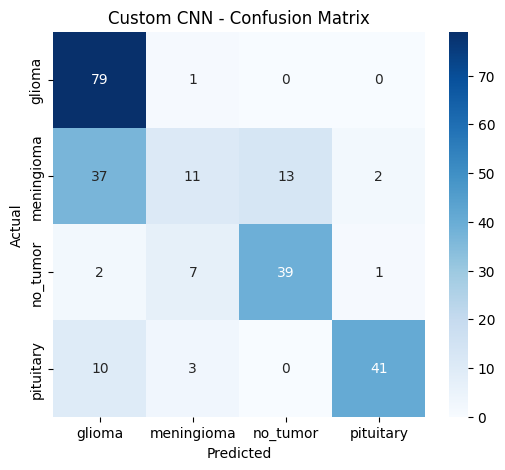


📌 EVALUATION: EfficientNetB0
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step

📌 Classification Report:
              precision    recall  f1-score   support

      glioma       0.33      1.00      0.49        80
  meningioma       0.00      0.00      0.00        63
    no_tumor       0.00      0.00      0.00        49
   pituitary       0.00      0.00      0.00        54

    accuracy                           0.33       246
   macro avg       0.08      0.25      0.12       246
weighted avg       0.11      0.33      0.16       246



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


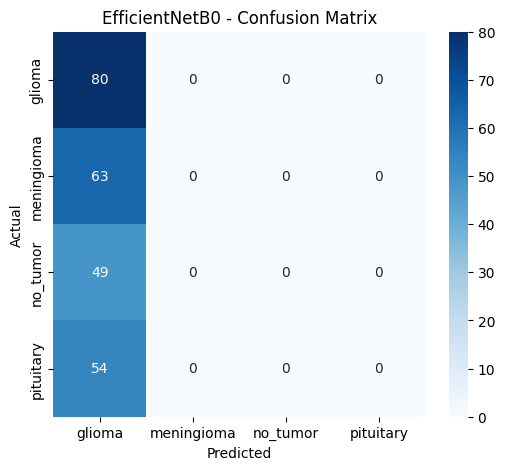

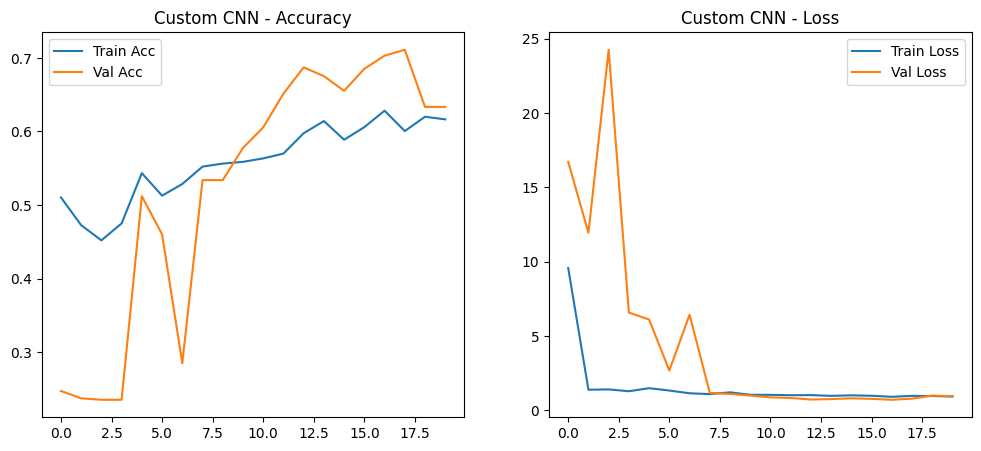

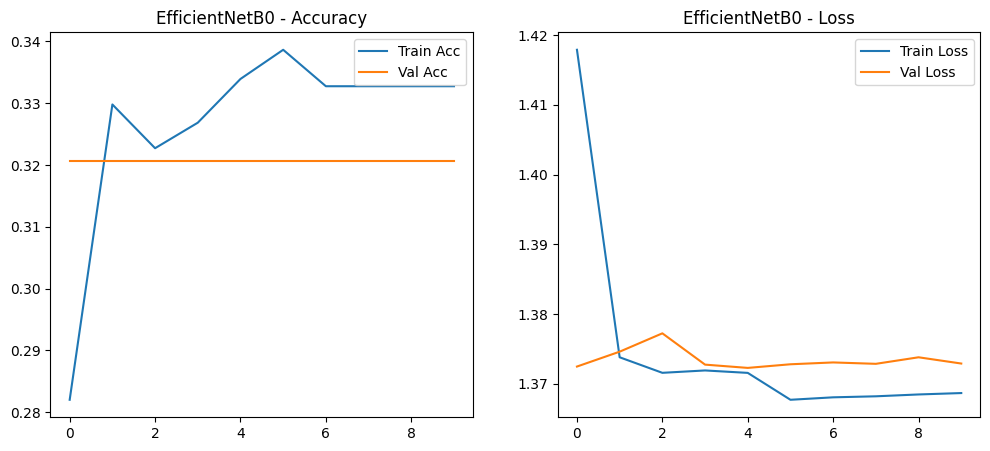


🎉🔥 FULL TRAINING + EVALUATION COMPLETED SUCCESSFULLY!


In [ ]:
# ============================================================
# 🚀 FULL PIPELINE: MODEL TRAINING + MODEL EVALUATION
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ============================================================
# 📌 1. CALLBACKS
# ============================================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint_custom = ModelCheckpoint(
    "best_custom_cnn.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

checkpoint_tl = ModelCheckpoint(
    "best_efficientnet.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# ============================================================
# 📌 2. CUSTOM CNN MODEL
# ============================================================

def build_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ============================================================
# 📌 3. TRANSFER LEARNING: EfficientNetB0
# ============================================================

def build_efficientnet():
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg'
    )

    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ============================================================
# 📌 4. TRAIN BOTH MODELS
# ============================================================

print("\n🚀 Training Custom CNN...")
custom_model = build_custom_cnn()

history_custom = custom_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, checkpoint_custom]
)

print("\n🚀 Training EfficientNetB0...")
tl_model = build_efficientnet()

history_tl = tl_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, checkpoint_tl]
)

print("\n🎉 TRAINING COMPLETED FOR BOTH MODELS!")

# ============================================================
# 📌 5. LOAD BEST SAVED MODELS FOR EVALUATION
# ============================================================

custom_best = load_model("best_custom_cnn.h5")
tl_best = load_model("best_efficientnet.h5")

# ============================================================
# 📌 6. MODEL EVALUATION FUNCTION
# ============================================================

def evaluate_model(model, test_gen, title):
    print("\n=====================================")
    print(f"📌 EVALUATION: {title}")
    print("=====================================")

    # Predictions
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    class_labels = list(test_gen.class_indices.keys())

    # Classification Report
    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ============================================================
# 📌 7. EVALUATE BOTH MODELS
# ============================================================

evaluate_model(custom_best, test_gen, "Custom CNN")
evaluate_model(tl_best, test_gen, "EfficientNetB0")

# ============================================================
# 📌 8. TRAINING HISTORY PLOTS
# ============================================================

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title(f"{title} - Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.show()

plot_history(history_custom, "Custom CNN")
plot_history(history_tl, "EfficientNetB0")

print("\n🎉🔥 FULL TRAINING + EVALUATION COMPLETED SUCCESSFULLY!")


In [ ]:
# =============================================
# GENERATE PREDICTIONS FOR BOTH MODELS
# =============================================

# 🔵 Custom CNN Predictions
preds_custom = custom_best.predict(test_gen)
y_pred_custom = np.argmax(preds_custom, axis=1)
y_true_custom = test_gen.classes

# 🟢 EfficientNet Predictions
preds_tl = tl_best.predict(test_gen)
y_pred_tl = np.argmax(preds_tl, axis=1)
y_true_tl = test_gen.classes

print("✔ Predictions generated successfully!")


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
✔ Predictions generated successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 MODEL PERFORMANCE COMPARISON

🔵 Custom CNN:
Accuracy: 0.6911
Precision: 0.6827
Recall: 0.6911
F1-Score: 0.6508

🟢 EfficientNetB0:
Accuracy: 0.3252
Precision: 0.1058
Recall: 0.3252
F1-Score: 0.1596


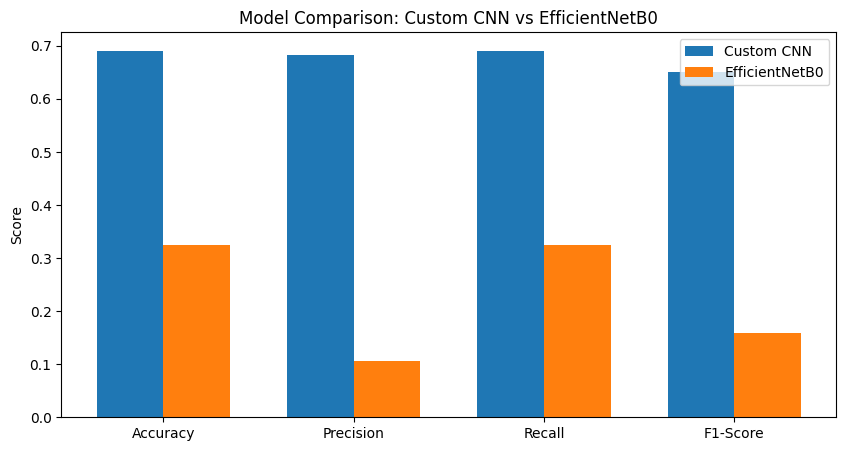

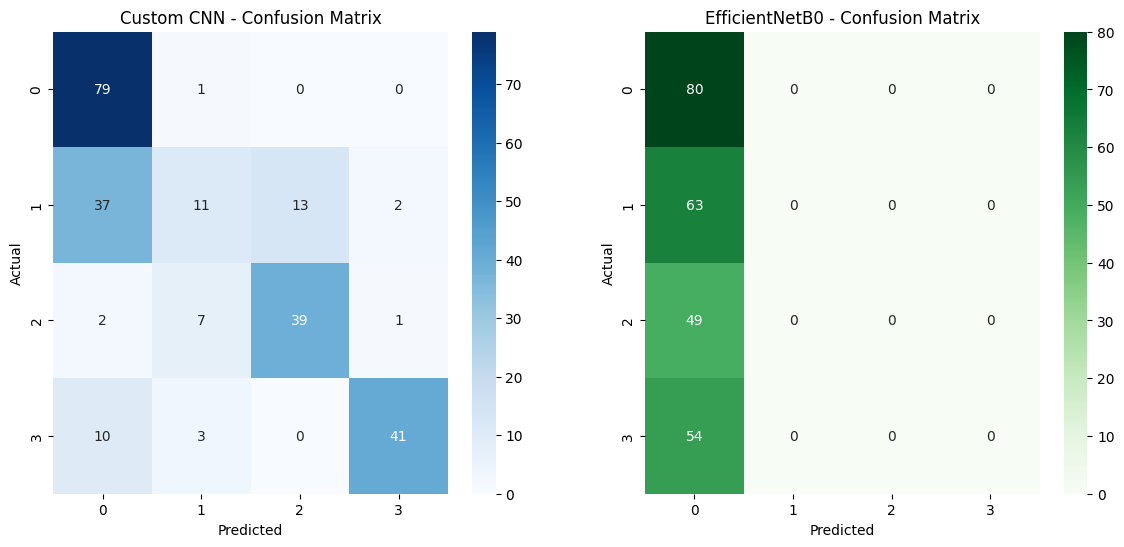


🏆 FINAL MODEL RECOMMENDATION
🔥 Custom CNN performs better and is recommended for deployment!


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===================================================
# 1️⃣ Compute Metrics Function
# ===================================================
def compute_scores(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }

# ===================================================
# 2️⃣ Compute Scores for Both Models
# ===================================================
custom_scores = compute_scores(y_true_custom, y_pred_custom)
tl_scores = compute_scores(y_true_tl, y_pred_tl)

# ===================================================
# 3️⃣ Display Score Comparison Table
# ===================================================
print("============================================")
print("📊 MODEL PERFORMANCE COMPARISON")
print("============================================")

print("\n🔵 Custom CNN:")
for k, v in custom_scores.items():
    print(f"{k}: {v:.4f}")

print("\n🟢 EfficientNetB0:")
for k, v in tl_scores.items():
    print(f"{k}: {v:.4f}")

# ===================================================
# 4️⃣ Bar Chart Comparison
# ===================================================
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
custom_vals = list(custom_scores.values())
tl_vals = list(tl_scores.values())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, custom_vals, width, label='Custom CNN')
plt.bar(x + width/2, tl_vals, width, label='EfficientNetB0')

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Model Comparison: Custom CNN vs EfficientNetB0")
plt.legend()
plt.show()

# ===================================================
# 5️⃣ Confusion Matrices (side-by-side)
# ===================================================
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

cm_custom = confusion_matrix(y_true_custom, y_pred_custom)
cm_tl = confusion_matrix(y_true_tl, y_pred_tl)
class_labels = list(test_gen.class_indices.keys())

sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Custom CNN - Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(cm_tl, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("EfficientNetB0 - Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

# ===================================================
# 6️⃣ Final Recommendation
# ===================================================
print("\n============================================")
print("🏆 FINAL MODEL RECOMMENDATION")
print("============================================")

if tl_scores["Accuracy"] > custom_scores["Accuracy"]:
    print("🚀 EfficientNetB0 performs better and is recommended for deployment!")
else:
    print("🔥 Custom CNN performs better and is recommended for deployment!")
